<a href="https://colab.research.google.com/github/antonvandike/Algoritmos-Geneticos/blob/main/Libro_Eyal_Wirsansky/Handson_chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capitulo 3: Usando el entorno DEAP



In [ ]:
pip install deap

##Usando el modulo creator

In [ ]:
from deap import creator
from deap import base

El modulo creator permite crear las clases de aptitud (Fitness) y la estrategia de aptitud (fitness strategy)

In [ ]:
# Para maximizar
creator.create('FitnessMax_1', base.Fitness, weights=(1.0,))

In [ ]:
# Para minimizar
creator.create('FitnessMin_1', base.Fitness, weights = (-1.0,))

In [ ]:
# Diferentes importancias de optimizacion y maximizacion o minimizacion
creator.create('FitnessCompound_1', base.Fitness, weights = (1.0,0.2,-0.5))

Tambien permite crea la clase de individuos (Individual)

In [ ]:
creator.create('Individual_1', list , fitness = creator.FitnessMax_1)

##Usando la clase Toolbox

Ejemplo

In [ ]:
def sumOfTwo(a,b):
  return(a+b)

In [ ]:
toolbox = base.Toolbox()
toolbox.register('incrementByFive', sumOfTwo, b = 5 )

In [ ]:
toolbox.incrementByFive(10)

15

De forma analoga, se tiene

In [ ]:
sumOfTwo(10,5)

15

##Creando operadores genéticos

El modulo tools contiene numerasas funciones de ayuda relacionadas a los operadores geneticos de seleccion, cruza y mutacion

In [ ]:
from deap import tools

In [ ]:
# Para la estrategia de seleccion
toolbox.register('select_1', tools.selTournament, tournsize = 3)

# Para la estrategia de cruza
toolbox.register('mate_1',tools.cxESTwoPoint)

# Para la estrategia de mutacion
toolbox.register('mutate_1', tools.mutFlipBit, indpb = 0.02)

##Creando la población

Se utiliza particularmente la funcion util initRepeat(), la cual se usa para guardar los objetos resultantes, generarlos y cuantos se generan

In [ ]:
import random as rd

In [ ]:
# Usa tres argumentos
# tipo de contendor, herramienta de generacion, cantidad de elementos generados
randomList = tools.initRepeat( list, rd.random , 3 )

print(randomList)

[0.31927646819011246, 0.5028226389927458, 0.06271434354671779]


¿Que pasa si queremos una lista con numero aleatorios enteros que sean 0 y 1?

In [ ]:
def zeroOrOne_1():
  return(rd.randint(0,1))

In [ ]:
randomList = tools.initRepeat( list , zeroOrOne_1 , 3)

print(randomList)

[1, 1, 1]


O aprovechando toolbox como sigue

In [ ]:
toolbox.register('zeroOrOne_2', rd.randint , 0 ,1)
randomList = tools.initRepeat( list , toolbox.zeroOrOne_2 , 3)
print(randomList)

[1, 1, 1]


##Calculando la aptitud

Se crea la funcion para calcular la aptitud por separado, tipicamente registrada con el modulo toolbox usando el alias evaluate como se muestra

In [ ]:
def someFitnessCalculationFunction_1(individual):
  return _some_calculation_of_the_fitness

In [ ]:
toolbox.register('evaluate_1', someFitnessCalculationFunction_1)

##El problema de un maximo || The OneMax problem

El problema de un maximo es una tarea de optimizacion simple que es amenudo usada como el 'Hola mundo' de los entornos de algoritmos geneticos.

La tarea de Un maximo es encontrar la cadena binaria de una longitud dada que maximice la suma de sus digitos, la cual, obviamente es una cadena con solo el numero 1.

Cromosoma: seran cadenas binarias con valores de 0 y 1

Aptitud: El valor de aptitud será la suma directa de la lista y es un problema de maximización

Operadores genéticos:


 Selección: Torneo

 Cruza: cruza de un punto

 Mutación: Inversion de un bit

 Condición de termino: Suma de de la cadenaigual al tamaño del problema o numero fijo de generaciones



###Configuraciones y definiciones

In [ ]:
# Paso 1: Modulos
from deap import base
from deap import creator
from deap import tools

import random as rd
import matplotlib.pyplot as plt

In [ ]:
## Paso 2: Parametros del problema

ONE_MAX_LENGTH = 100      # Tamaño del problema (longitud de las cadenas binarias)

POPULATION_SIZE = 200     # Tamaño de los inidivios de la población
P_CROSSOVER     =   0.9   # Probabilidad de cruza
P_MUTATION      =   0.1   # Probabilidad de mutación

MAX_GENERATIONS =  50     # Maximo numero de generaciones (condición de termino)

In [ ]:
## Paso 3: Elementos aleatorios

RANDOM_SEED = 42          # Comunmente cuando se experimenta con un codigo
rd.seed(RANDOM_SEED)      # se corre el problema con los mismos parametros
                          # para repetir y compara resultados


In [ ]:
## Paso 4: Declarando el cromosoma

toolbox = base.Toolbox()
toolbox.register('ZeroOrOne', rd.randint , 0 , 1)

In [ ]:
## Paso 5: Crear la funcion de aptitud (FITNESS)

# Se indica maximizacion y un solo peso
creator.create('FitnessMax', base.Fitness, weights = (1.0,))

In [ ]:
## Paso 6: Crear la funcion de  aptitud del individuo

creator.create('Individual', list, fitness = creator.FitnessMax)

In [ ]:
## Paso 7: Declarar el operador para generador de individuos

toolbox.register('IndividualCreator', tools.initRepeat, creator.Individual, toolbox.ZeroOrOne, ONE_MAX_LENGTH)

In [ ]:
## Paso 8: Declarar el operador para generar la poblacion

toolbox.register('PopulationCreator', tools.initRepeat, list, toolbox.IndividualCreator)

In [ ]:
## Paso 9: Herramienta para calcular la aptitud

def OneMaxFitness(Individual):
  return sum(Individual),

In [ ]:
## Paso 10: Declarar el operador de evaluacion

toolbox.register('evaluate',OneMaxFitness)

In [ ]:
## Paso 11: Declarar los operadores geneticos

toolbox.register('select', tools.selTournament, tournsize = 3)
toolbox.register('mate',   tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb = 1.0/ONE_MAX_LENGTH)

###Evolucionando la solución

In [ ]:
## Paso 1: Generar la poblacion inicial

population = toolbox.PopulationCreator(n=POPULATION_SIZE)
generationCounter = 0

In [ ]:
## Paso 2: Calculando la aptitud de los elementos de la poblacion

fitnessValues = list(map(toolbox.evaluate, population))

In [ ]:
## Paso 3: Combinar la aptitud con su respectivo individuo
for individual, fitnessValue in zip(population, fitnessValues):
  individual.fitness.values = fitnessValue

In [ ]:
## Paso 4: Extraer estadisticas (extraer) el primer valor de cada aptitud)
fitnessValues = [individual.fitness.values[0] for individual in population]

In [ ]:
## Paso 5: Definir el contenedor de las maximas aptitudes y el promedio
##         de aptitudes de la poblacion

maxFitnessValues = []
meanFitnessValues = []

- Generation 1: Max Fitness = 65.0, Avg Fitness = 53.575
Best Individual =  1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 2: Max Fitness = 66.0, Avg Fitness = 56.855
Best Individual =  1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 3: Max Fitness = 69.0, Avg Fitness = 59.42
Best Individual =  1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 

- Generation 4: Max Fitness = 70.0, Avg Fitness = 62.03
Best Individual =  1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 

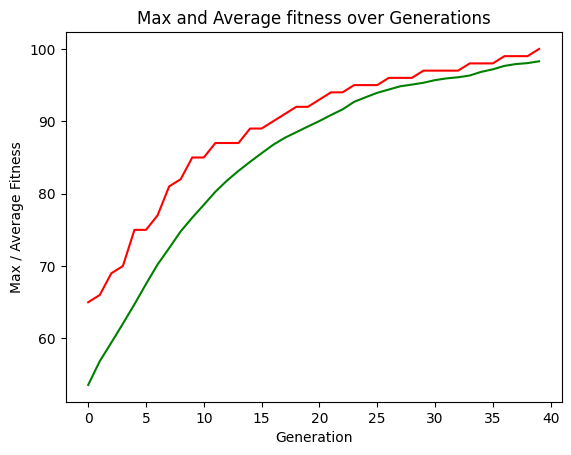

In [ ]:
## Paso 6: Estructura del programa

# Condicion de termino
while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:

  # Contador de cuantas generaciones van
  generationCounter = generationCounter + 1

  # Operador de seleccion
  offspring = toolbox.select(population, len(population))

  # Descendencia clonada, para no alterar la original
  offspring = list(map(toolbox.clone, offspring))

  # Operador de cruza
  for child1, child2 in zip(offspring[::2], offspring[1::2]):
    if rd.random() < P_CROSSOVER:
      toolbox.mate(child1, child2)
      del child1.fitness.values
      del child2.fitness.values

  # Operador de mutacion
  for mutant in offspring:
    if rd.random() < P_MUTATION:
      toolbox.mutate(mutant)
      del mutant.fitness.values

  # Encontrar a los nuevos individuos y asignarles su valor de aptitud
  freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
  freshFitnessValues = list(map(toolbox.evaluate,freshIndividuals))

  for individual, fitnessValue in zip(freshIndividuals,freshFitnessValues):
    individual.fitness.values = fitnessValue

  # Reemplazar la poblacion vieja con la nueva
  population[:] = offspring

  # Recopilar datos estadisticos
  fitnessValues = [ind.fitness.values[0] for ind in population]

  # La mejor aptitud y la aptitud promedio de la poblacion, para cononcer el avance del algoritmo
  maxFitness = max(fitnessValues)
  meanFitness = sum(fitnessValues) / len(population)
  maxFitnessValues.append(maxFitness)
  meanFitnessValues.append(meanFitness)
  print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))

  # El mejor individuo de la poblacion
  best_index = fitnessValues.index(max(fitnessValues))
  print("Best Individual = ", *population[best_index], "\n")

# Resumen grafico de la evolución de los resultados
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()
